<h1> Naive Bayes </h1>

## 1.1 Loading Data

In [90]:
#make sure you are loading atleast 50k datapoints
#you can work with features of preprocessed_data.csv for the assignment.
# If you want to add more features, you can add. (This is purely optional, not mandatory)

import pandas
data = pandas.read_csv('/content/drive/MyDrive/appliedai/6_Donors_choose_NB/preprocessed_data.csv') 

In [91]:
#head
data.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03


In [92]:
data.shape  #shape

(109248, 9)

In [93]:
data.isna().sum() # no null values

school_state                                    0
teacher_prefix                                  0
project_grade_category                          0
teacher_number_of_previously_posted_projects    0
project_is_approved                             0
clean_categories                                0
clean_subcategories                             0
essay                                           0
price                                           0
dtype: int64

In [94]:
data['project_is_approved'].value_counts() #imbalanced data

1    92706
0    16542
Name: project_is_approved, dtype: int64

In [95]:
y_data=data.pop('project_is_approved') # dividing data into x_data,y_data
x_data=data

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [97]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,random_state=42,stratify=y_data)

In [98]:
x_train.shape,y_train.shape

((81936, 8), (81936,))

<h2>1.3 Make Data Model Ready: encoding essay, and project_title</h2>

In [99]:
# Apply Bag of Words (BOW) vectorization on 'Preprocessed_Essay' 
# Apply Bag of Words (BOW) vectorization on 'Preprocessed_Title' (Optional)
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer=CountVectorizer()
bow_vectorizer.fit(x_train['essay'])
train_essay=bow_vectorizer.transform(x_train['essay'])
test_essay=bow_vectorizer.transform(x_test['essay'])

In [100]:
train_essay.shape,test_essay.shape

((81936, 50440), (27312, 50440))

In [101]:
# Apply TF-IDF vectorization on 'Preprocessed_Essay' 
# Apply TF-IDF vectorization on 'Preprocessed_Title' (Optional)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer()
tfidf_vectorizer.fit(x_train['essay'])
train_essay_tfidf=tfidf_vectorizer.transform(x_train['essay'])
test_essay_tfidf=tfidf_vectorizer.transform(x_test['essay'])

In [102]:
train_essay_tfidf.shape

(81936, 50440)

<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [166]:
# Apply One-Hot Encoding on the categorical features either using OneHotEncoder() (or) CountVectorizer(binary=True)
# Apply Normalization on the numerical features using Normalizer().


In [104]:
#return transformed train and test
def categorical_features(data,data1):
  vectorizer=CountVectorizer(binary=True)
  vectorizer.fit(data)
  return vectorizer.transform(data),vectorizer.transform(data1)

teacher_prefix

In [105]:
teacher_prefix_train,teacher_prefix_test=categorical_features(x_train['teacher_prefix'],x_test['teacher_prefix'])
print('After Vectorization shape')
print(teacher_prefix_train.shape,teacher_prefix_test.shape)

After Vectorization shape
(81936, 5) (27312, 5)


project_grade

In [106]:
project_grade_category_train,project_grade_category_test=categorical_features(x_train['project_grade_category'],x_test['project_grade_category'])
print('After Vectorization shape')
print(project_grade_category_train.shape,project_grade_category_test.shape)

After Vectorization shape
(81936, 4) (27312, 4)


school_state

In [107]:
school_state_train,school_state_test=categorical_features(x_train['school_state'],x_test['school_state'])
print('After Vectorization shape')
print(school_state_train.shape,school_state_test.shape)

After Vectorization shape
(81936, 51) (27312, 51)


clean_categories

In [108]:
clean_categories_train,clean_categories_test=categorical_features(x_train['clean_categories'],x_test['clean_categories'])
print('After Vectorization shape')
print(clean_categories_train.shape,clean_categories_test.shape)

After Vectorization shape
(81936, 9) (27312, 9)


clean_subcategories

In [109]:
clean_subcategories_train,clean_subcategories_test=categorical_features(x_train['clean_subcategories'],x_test['clean_subcategories'])
print('After Vectorization shape')
print(clean_subcategories_train.shape,clean_subcategories_test.shape)

After Vectorization shape
(81936, 30) (27312, 30)


**Numeric features**

 price

In [110]:
from sklearn.preprocessing import Normalizer
norm=Normalizer()
price_train=norm.fit_transform(x_train['price'].values.reshape(1,-1))
price_test=norm.fit_transform(x_test['price'].values.reshape(1,-1))

teacher_number_of_previously_posted_projects

In [111]:
from sklearn.preprocessing import Normalizer
norm=Normalizer()
teacher_number_of_previously_posted_projects_train=norm.fit_transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
teacher_number_of_previously_posted_projects_test=norm.fit_transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

In [113]:
#reshaping numerical features for hstack   
price_train=price_train.reshape(-1,1)   #to one column
teacher_number_of_previously_posted_projects_train=teacher_number_of_previously_posted_projects_train.reshape(-1,1)
price_test=price_test.reshape(-1,1)
teacher_number_of_previously_posted_projects_test=teacher_number_of_previously_posted_projects_test.reshape(-1,1)

set-1 categorical, numerical features + preprocessed_eassay (BOW)

In [114]:
from scipy.sparse import hstack
final_x_train_bow=hstack([teacher_prefix_train,project_grade_category_train,school_state_train,clean_categories_train,clean_subcategories_train,price_train,teacher_number_of_previously_posted_projects_train,train_essay])
final_x_test_bow=hstack([teacher_prefix_test,project_grade_category_test,school_state_test,clean_categories_test,clean_subcategories_test,price_test,teacher_number_of_previously_posted_projects_test,test_essay])

In [115]:
print('final train categorical, numerical features + preprocessed_eassay (BOW) shape {}'.format(final_x_train_bow.shape))
print('final test categorical, numerical features + preprocessed_eassay (BOW) shape {}'.format(final_x_test_bow.shape))

final train categorical, numerical features + preprocessed_eassay (BOW) shape (81936, 50541)
final test categorical, numerical features + preprocessed_eassay (BOW) shape (27312, 50541)


Set 2: categorical, numerical features + preprocessed_eassay (TFIDF)

In [116]:
final_x_train_tfidf=hstack([teacher_prefix_train,project_grade_category_train,school_state_train,clean_categories_train,clean_subcategories_train,price_train,teacher_number_of_previously_posted_projects_train,train_essay_tfidf])
final_x_test_tfidf=hstack([teacher_prefix_test,project_grade_category_test,school_state_test,clean_categories_test,clean_subcategories_test,price_test,teacher_number_of_previously_posted_projects_test,test_essay_tfidf])

In [117]:
print('final train categorical, numerical features + preprocessed_eassay (TFIDF) shape {}'.format(final_x_train_tfidf.shape))
print('final test categorical, numerical features + preprocessed_eassay (TFIDF) shape {}'.format(final_x_test_tfidf.shape))

final train categorical, numerical features + preprocessed_eassay (TFIDF) shape (81936, 50541)
final test categorical, numerical features + preprocessed_eassay (TFIDF) shape (27312, 50541)


<h2> Appling NB on different kind of featurization</h2>


#### Set 1

In [118]:
# Perform Hyperparameter Tuning.
# Plot the training and the CV AUC scores, for different values of 'alpha', using a 2D line plot
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
a={'alpha':[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}
clf =GridSearchCV(MultinomialNB(class_prior=[0.5,0.5]),a,cv=10,n_jobs=-1,scoring='roc_auc',error_score=True,return_train_score=True)
clf.fit(final_x_train_bow,y_train)

GridSearchCV(cv=10, error_score=True,
             estimator=MultinomialNB(class_prior=[0.5, 0.5]), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0005, 0.0001, 0.005, 0.001, 0.05,
                                   0.01, 0.1, 0.5, 1, 5, 10, 50, 100]},
             return_train_score=True, scoring='roc_auc')

In [119]:
results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha']) #sorting results to increasing order of alphas

In [120]:
train_auc=results['mean_train_score']
test_auc=results['mean_test_score']
alphas=results['param_alpha']

In [121]:
import matplotlib.pyplot as plt
import math
import numpy as np

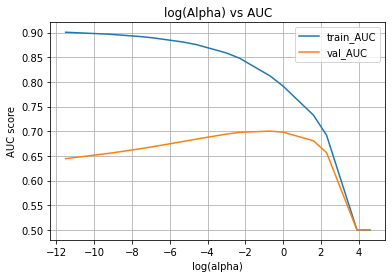

In [122]:
log_alphas=list(map(lambda x : math.log(x),alphas))
plt.plot(log_alphas,train_auc,label='train_AUC')
plt.plot(log_alphas,test_auc,label='val_AUC')
plt.xlabel('log(alpha)')
plt.ylabel('AUC score')
plt.title('log(Alpha) vs AUC')
plt.legend()
plt.grid()
plt.show()

In [123]:
clf.best_params_

{'alpha': 0.5}

In [124]:
# Obtain the optimal value for 'alpha' and using the obtained optimal 'alpha' value, fit a multinomial naive bayes model, on the train data,
# Note: If you have split the datase into 3 parts (ie., train, cv and test sets) in the beginning, then the training datafor this final model would be (train set + cv set)
# Make class label and probability predictions on the train and test data.
model=MultinomialNB(class_prior=[0.5,0.5],alpha=0.5)
model.fit(final_x_train_bow,y_train)


MultinomialNB(alpha=0.5, class_prior=[0.5, 0.5])

In [125]:
train_prob=model.predict_proba(final_x_train_bow)
test_prob=model.predict_proba(final_x_test_bow)

In [126]:
train_prob=np.array(list(map(lambda x : x[1],train_prob)))  #predict prob has probabalitity for 0 and 1 ,so taking only 1 probabality 
test_prob=np.array(list(map(lambda x:x[1],test_prob)))

In [127]:
train_prob.shape

(81936,)

In [128]:
# Plot the ROC-AUC curves using the probability predictions made on train and test data.
from sklearn.metrics import roc_curve,auc
fpr_train,tpr_train,thresholds_train=roc_curve(y_train,train_prob)
fpr_test,tpr_test,thresholds_test=roc_curve(y_test,test_prob)

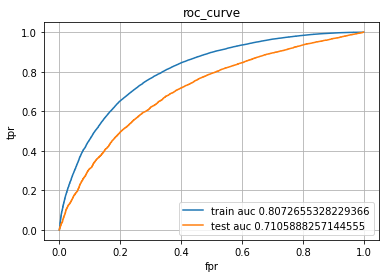

In [129]:
plt.plot(fpr_train,tpr_train,label='train auc {}'.format(auc(fpr_train,tpr_train)))
plt.plot(fpr_test,tpr_test,label='test auc {}'.format(auc(fpr_test,tpr_test)))
plt.legend()
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc_curve')
plt.grid()
plt.show()

In [130]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t
def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [131]:
best_t_train=find_best_threshold(thresholds_train,fpr_train,tpr_train)

the maximum value of tpr*(1-fpr) 0.5389619424625753 for threshold 0.548


In [132]:
after_best_t_train=predict_with_best_t(train_prob,best_t_train)

In [133]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train,after_best_t_train)

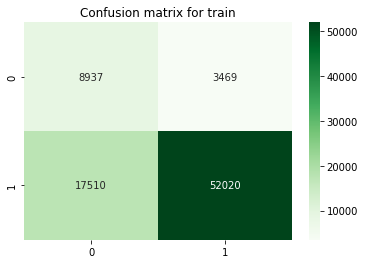

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt     
sns.heatmap(cm, annot=True,fmt="d",cmap='Greens')
plt.title('Confusion matrix for train')
plt.show()

In [135]:
best_t_train

0.5484401129171619

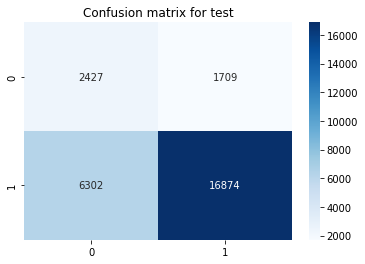

In [136]:
#best_t_test=find_best_threshold(thresholds_test,fpr_test,tpr_test)
after_best_t_test=predict_with_best_t(test_prob,best_t_train)  #best thresholds
cm1=confusion_matrix(y_test,after_best_t_test)
sns.heatmap(cm1,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion matrix for test')
plt.show()

#### Set 2

Set 2: categorical, numerical features + preprocessed_eassay (TFIDF)

In [139]:
# Perform Hyperparameter Tuning.
# Plot the training and the CV AUC scores, for different values of 'alpha', using a 2D line plot
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
a={'alpha':[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}
clf =GridSearchCV(MultinomialNB(class_prior=[0.5,0.5]),a,cv=10,n_jobs=-1,scoring='roc_auc',error_score=True,return_train_score=True)
clf.fit(final_x_train_tfidf,y_train)

GridSearchCV(cv=10, error_score=True,
             estimator=MultinomialNB(class_prior=[0.5, 0.5]), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0005, 0.0001, 0.005, 0.001, 0.05,
                                   0.01, 0.1, 0.5, 1, 5, 10, 50, 100]},
             return_train_score=True, scoring='roc_auc')

In [140]:
results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])

In [141]:
train_auc=results['mean_train_score']
test_auc=results['mean_test_score']
alphas=results['param_alpha']

In [142]:
import matplotlib.pyplot as plt
import math

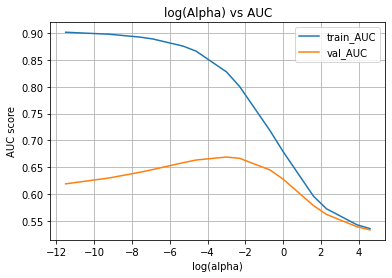

In [143]:
log_alphas=list(map(lambda x : math.log(x),alphas))
plt.plot(log_alphas,train_auc,label='train_AUC')
plt.plot(log_alphas,test_auc,label='val_AUC')
plt.xlabel('log(alpha)')
plt.ylabel('AUC score')
plt.title('log(Alpha) vs AUC')
plt.legend()
plt.grid()
plt.show()

In [144]:
clf.best_params_

{'alpha': 0.05}

In [145]:

model=MultinomialNB(class_prior=[0.5,0.5],alpha=0.05)
model.fit(final_x_train_tfidf,y_train)


MultinomialNB(alpha=0.05, class_prior=[0.5, 0.5])

In [146]:
train_prob=model.predict_proba(final_x_train_tfidf)
test_prob=model.predict_proba(final_x_test_tfidf)

In [147]:
train_prob=np.array(list(map(lambda x : x[1],train_prob)))
test_prob=np.array(list(map(lambda x:x[1],test_prob)))

In [148]:
train_prob.shape

(81936,)

In [149]:
# Plot the ROC-AUC curves using the probability predictions made on train and test data.
from sklearn.metrics import roc_curve,auc
fpr_train,tpr_train,thresholds_train=roc_curve(y_train,train_prob)
fpr_test,tpr_test,thresholds_test=roc_curve(y_test,test_prob)

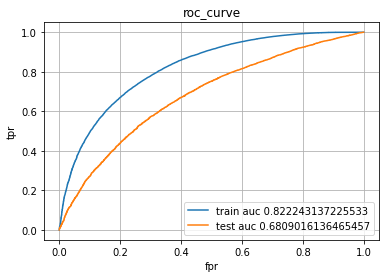

In [150]:
plt.plot(fpr_train,tpr_train,label='train auc {}'.format(auc(fpr_train,tpr_train)))
plt.plot(fpr_test,tpr_test,label='test auc {}'.format(auc(fpr_test,tpr_test)))
plt.legend()
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc_curve')
plt.grid()
plt.show()

In [151]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t
def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [152]:
best_t_train=find_best_threshold(thresholds_train,fpr_train,tpr_train)

the maximum value of tpr*(1-fpr) 0.5487712006774766 for threshold 0.511


In [153]:
after_best_t_train=predict_with_best_t(train_prob,best_t_train)

In [154]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train,after_best_t_train)

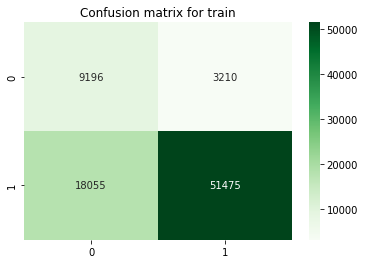

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt     

sns.heatmap(cm, annot=True,fmt="d",cmap='Greens')
plt.title('Confusion matrix for train')
plt.show()

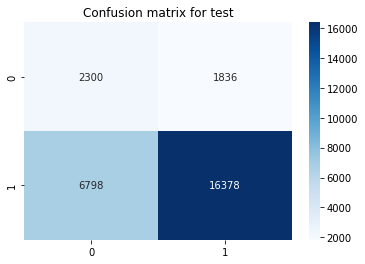

In [167]:
#best_t_test=find_best_threshold(thresholds_test,fpr_test,tpr_test)
after_best_t_test=predict_with_best_t(test_prob,best_t_train) #best threshold
cm1=confusion_matrix(y_test,after_best_t_test)
sns.heatmap(cm1,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion matrix for test')
plt.show()

# Top 20 features

In [157]:
#ALL features
l=[]
vec=CountVectorizer(binary=True)
vec.fit(x_train['teacher_prefix'])
l.extend(vec.get_feature_names())
vec=CountVectorizer(binary=True)
vec.fit(x_train['project_grade_category'])
l.extend(vec.get_feature_names())
vec=CountVectorizer(binary=True)
vec.fit(x_train['school_state'])
l.extend(vec.get_feature_names())
vec=CountVectorizer(binary=True)
vec.fit(x_train['clean_categories'])
l.extend(vec.get_feature_names())
vec=CountVectorizer(binary=True)
vec.fit(x_train['clean_subcategories'])
l.extend(vec.get_feature_names())
l.extend(['price'])
l.extend(['teacher_number_of_previously_posted_projects'])
l.extend(bow_vectorizer.get_feature_names())
#l.extend(tfidf_vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [158]:
# Either from set 1 (or) set 2, print the names of the top 20 features associated with the positive and negative classes each. (You have to print the names of the features, but not the indexes)
negitive_class=np.argsort(model.feature_log_prob_[0])
positive_class=np.argsort(model.feature_log_prob_[1])

In [159]:
l=np.array(l)
print("top 20 negative features are : \n{}".format(l[negitive_class[-1:-20:-1]]))

top 20 negative features are : 
['mrs' 'literacy_language' 'grades_prek_2' 'math_science' 'ms'
 'grades_3_5' 'mathematics' 'literacy' 'literature_writing' 'grades_6_8'
 'specialneeds' 'specialneeds' 'health_sports' 'ca' 'students'
 'appliedlearning' 'appliedsciences' 'grades_9_12' 'mr']


In [160]:
print("top 20 positive features are : \n{}".format(l[positive_class[-1:-20:-1]]))

top 20 positive features are : 
['mrs' 'literacy_language' 'grades_prek_2' 'math_science' 'ms'
 'grades_3_5' 'literacy' 'mathematics' 'literature_writing' 'grades_6_8'
 'ca' 'health_sports' 'students' 'specialneeds' 'specialneeds'
 'appliedlearning' 'grades_9_12' 'mr' 'appliedsciences']


<h1>3. Summary</h1>

In [164]:

from prettytable import PrettyTable
x = PrettyTable()
x.field_names=['vectorizer','hyper parameter','AUC']
x.add_row(['bow',0.05,0.71])
x.add_row(['Tfidf',0.05,0.68])

In [165]:
print(x)

+------------+-----------------+------+
| vectorizer | hyper parameter | AUC  |
+------------+-----------------+------+
|    bow     |       0.05      | 0.71 |
|   Tfidf    |       0.05      | 0.68 |
+------------+-----------------+------+
